# PHYS 295 Lab 3 Code
I will use this code to get the linear graph needed for the Lab 3 assignment.

In [24]:
#Lab 3 - 
from matplotlib import pyplot as plt 
from scipy import stats
import numpy as np  
import pandas as pd
import csv

def load_data(filename):
    x_range = []
    y_range = [[],[],[],[],[]]
    with open(filename) as numbers:
        numbers_data = csv.reader(numbers, delimiter=",")
        next(numbers_data) #skip the header
        for row in numbers_data:
            #print(row)
            x_range.append(int(row[0]))
            y_range[0].append(float(row[1]))
            y_range[1].append(float(row[2]))
            y_range[2].append(float(row[3]))
            y_range[3].append(float(row[4]))
            y_range[4].append(float(row[5]))
        return x_range,y_range

data = load_data("PHYS 295 Lab 3 (Electron C-to-M Ratio).csv")
#print(data[0])
#print(data[1])

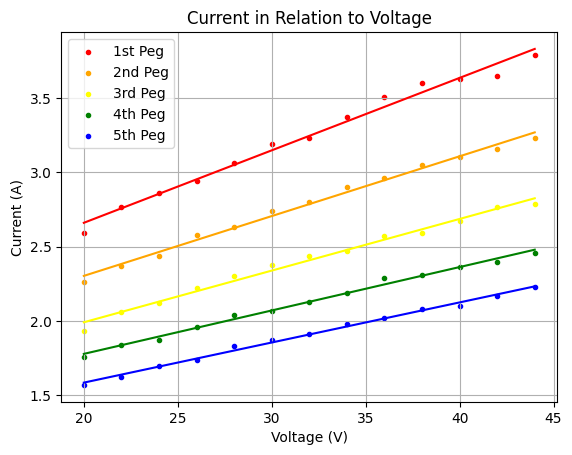

[1.57, 1.62, 1.7, 1.74, 1.83, 1.87, 1.91, 1.98, 2.02, 2.08, 2.1, 2.17, 2.23]


In [31]:
plt.figure()
rainbow = ['red', 'orange', 'yellow', 'green', 'blue']
for mark in range(0, 5):
    plt.scatter(data[0], data[1][mark], marker=".", color=rainbow[mark]) #add points to plot

x_val = np.array(data[0])
for mark in range(0, 5):
    x_ax, y_ax = np.polyfit(data[0], data[1][mark], 1)
    plt.plot(x_val, x_ax*x_val+y_ax, color=rainbow[mark]) #add line of best fit to plot

#plt.plot(data[0], data[1][0], color="r") #add line of best fit to plot
plt.legend(['1st Peg', '2nd Peg', '3rd Peg', '4th Peg', '5th Peg'], loc="upper left")
plt.grid()
plt.title("Current in Relation to Voltage") 
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.show()
print(data[1][4])

## Linearization of e/m data

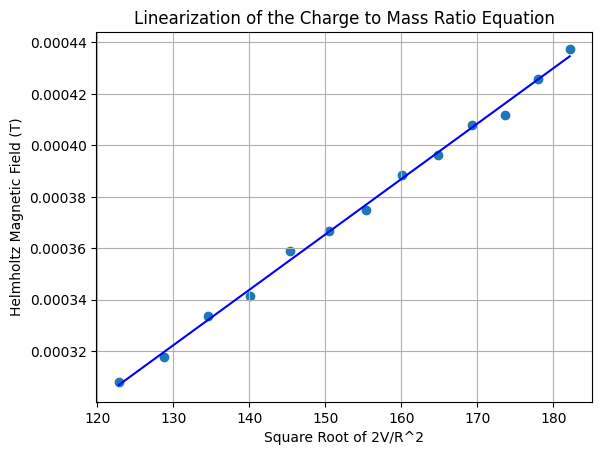

In [73]:
plt.figure()
helmholtzB = [(8*72*(4*np.pi*(10**-7))*x)/(np.sqrt(125)*0.33) for x in data[1][4]]
respondant = [np.sqrt((2*x)/(0.0515**2)) for x in data[0]]
plt.scatter(respondant, helmholtzB)
x_val = np.array(respondant)
x_ax, y_ax = np.polyfit(respondant, helmholtzB, 1)
plt.plot(x_val, x_ax*x_val+y_ax, color=rainbow[4]) #add line of best fit to plot
plt.grid()
plt.title("Linearization of the Charge to Mass Ratio Equation") 
plt.xlabel('Square Root of 2V/R^2')
plt.ylabel('Helmholtz Magnetic Field (T)')
plt.show()

In [81]:
stat = stats.linregress(x_val, helmholtzB)
#stat = stats.linregress(x_val, x_ax*x_val+y_ax)
print(stat)

LinregressResult(slope=np.float64(2.1521537955534417e-06), intercept=np.float64(4.260491223075964e-05), rvalue=np.float64(0.9984430009554436), pvalue=np.float64(3.831333629756375e-15), stderr=np.float64(3.625298236770087e-08), intercept_stderr=np.float64(5.631531241584602e-06))


In [82]:
ratio = (stat[0]**-2)
chargemassratio ="{:e}".format(ratio)
print("The theoretical value of the charge to mass ratio is 1.758820e+11 C/kg")
print(f"The experimental value of the charge to mass ratio is {chargemassratio} C/kg\n")
print("The theoretical value of the Earth's magnetic field is f 4.8e-5 T")
print(f"The experimental value of the Earth's magnetic field is {round(stat[1], 7)} T")

The theoretical value of the charge to mass ratio is 1.758820e+11 C/kg
The experimental value of the charge to mass ratio is 2.159004e+11 C/kg

The theoretical value of the Earth's magnetic field is f 4.8e-5 T
The experimental value of the Earth's magnetic field is 4.26e-05 T


In [83]:
exp = (8*72*(4*np.pi*(10**-7))*0.2)/(np.sqrt(125)*0.33)
print(exp)

3.923678337046747e-05


# Table of Data

In [85]:
table = {"Voltage (V)": data[0],
         "1st Peg (A)": data[1][0],
         "2nd Peg (A)": data[1][1],
         "3rd Peg (A)": data[1][2],
         "4th Peg (A)": data[1][3],
         "5th Peg (A)": data[1][4]}

show_table = pd.DataFrame(data=table)
show_table

,Voltage (V),1st Peg (A),2nd Peg (A),3rd Peg (A),4th Peg (A),5th Peg (A)
0,20,2.59,2.26,1.93,1.76,1.57
1,22,2.77,2.37,2.06,1.84,1.62
2,24,2.86,2.44,2.12,1.87,1.70
3,26,2.94,2.58,2.22,1.96,1.74
4,28,3.06,2.63,2.30,2.04,1.83
5,30,3.19,2.74,2.38,2.07,1.87
6,32,3.23,2.80,2.44,2.13,1.91
7,34,3.37,2.90,2.47,2.19,1.98
8,36,3.51,2.96,2.57,2.29,2.02
9,38,3.60,3.05,2.59,2.31,2.08
